In [1]:
import keras
from keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

Using TensorFlow backend.


In [2]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
#Sanity check
X_train.shape #60000 images of dimensions 28 x 28

(60000, 28, 28)

In [4]:
#Reshapeing X to a 2D array for PCA and then k-means
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]) #We will only be using X for clustering
X.shape

(60000, 784)

In [5]:
y = y_train

In [6]:
#Sanity check
print ("The shape of X is " + str(X.shape))
print ("The shape of y is " + str(y.shape)) #We will be using y only to check our clustering 

The shape of X is (60000, 784)
The shape of y is (60000,)


**INDEX of the dataset**
Will be used to check our clusters
* 0 is Tshirt
* 1 is Trouser 
* 2 is Pullover
* 3 is Dress
* 4 is Coat
* 5 is Sandal
* 6 is Shirt
* 7 is Sneaker
* 8 is Bag
* 9 is Ankle Boot

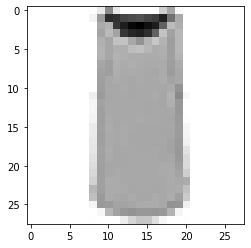

0

In [7]:
#Visualise an image 
n= 2 #Enter Index here to View the image 
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary)
plt.show()
y[n]

# PCA (Principle Component Analysis)

In [8]:
# To perform PCA we must first change the mean to 0 and variance to 1 for X using StandardScalar
Clus_dataSet = StandardScaler().fit_transform(X) #(mean = 0 and variance = 1)

In [9]:
from sklearn.decomposition import PCA
# Make an instance of the Model
variance = 0.98 #The higher the explained variance the more accurate the model will remain
pca = PCA(variance)

In [10]:
#fit the data according to our PCA instance
pca.fit(Clus_dataSet)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print("Number of components before PCA  = " + str(X.shape[1]))
print("Number of components after PCA 0.98 = " + str(pca.n_components_)) #dimension reduced from 784

Number of components before PCA  = 784
Number of components after PCA 0.98 = 420


In [12]:
#Transform our data according to our PCA instance
Clus_dataSet = pca.transform(Clus_dataSet)

In [13]:
print("Dimension of our data after PCA  = " + str(Clus_dataSet.shape)) 

Dimension of our data after PCA  = (60000, 420)


In [14]:
#To visualise the data inversed from PCA
approximation = pca.inverse_transform(Clus_dataSet)
print("Dimension of our data after inverse transforming the PCA  = " + str(approximation.shape))

Dimension of our data after inverse transforming the PCA  = (60000, 784)


3


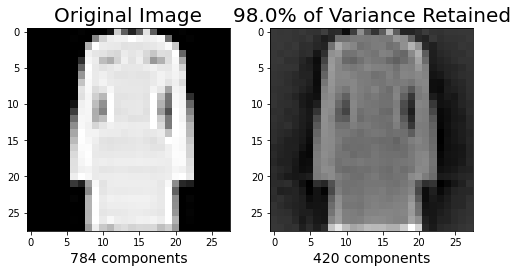

In [15]:
#image reconstruction using the less dimensioned data
plt.figure(figsize=(8,4));

n = 500 #index value, change to view different data

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(X.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 196 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(Clus_dataSet.shape[1]) +' components', fontsize = 14)
plt.title(str(variance * 100) + '% of Variance Retained', fontsize = 20);

print(y_train[n])

## K-MEANS ++

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 10 ( we have 10 classes according to INDEX)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: Depend on our inertia results </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [16]:
#THIS CODE TAKES A LONG TIME TO RUN, IT IS TO FIND THE n_init VALUE.
# #We will use k = 10, not the best choice but for simplicity as the INDEX has 10 values
# #to check for best n_init with k = 10
# inertia = []
# for k in range(5, 100):
#     kmeans = KMeans(init = "k-means++",n_clusters=10, n_init = k,random_state=1).fit(Clus_dataSet)
#     inertia.append(np.sqrt(kmeans.inertia_))

# plt.plot(range(5, 100), inertia, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$');

In [17]:
#n_clusters = 10 because INDEX has 10 values. Not the best value but a simple logic.
#The value of n_init at 35 yields good results so we will use it. For confirmation us the above code.
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 35)

In [18]:
#fit the data to our k_means model
k_means.fit(Clus_dataSet)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=35, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
k_means_labels = k_means.labels_ #List of labels of each dataset
print("The list of labels of the clusters are " + str(np.unique(k_means_labels)))

The list of labels of the clusters are [0 1 2 3 4 5 6 7 8 9]


In [20]:
G = len(np.unique(k_means_labels)) #Number of labels

#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue        

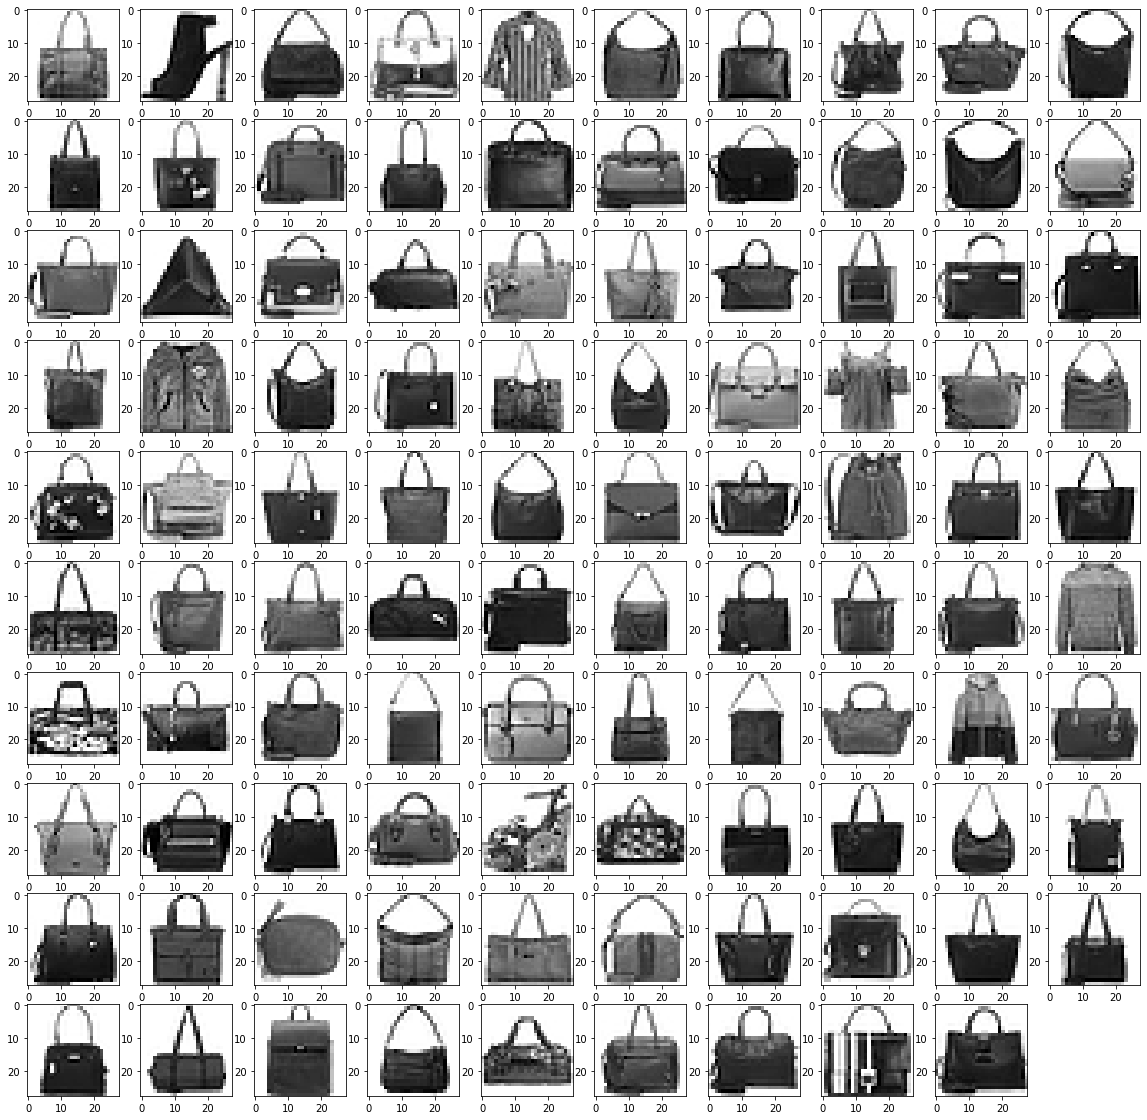

In [21]:
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust = 8 #enter label number to visualise
num = 100 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);
    
plt.show()

For Cluster 9 you can its mostly Ankle Boots with a few other items

In [22]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n] = y[cluster_index[n]] #Y_clust[0] contains array of "correct" category from y_train for the cluster_index[0]
    assert(len(Y_clust[n]) == len(cluster_index[n])) #dimension confirmation


In [23]:
#counts the number of each category in each cluster
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [24]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Number of items of a certain category in cluster 1

{0: 122, 1: 57, 2: 3524, 3: 40, 4: 3519, 6: 1874, 8: 134, 9: 3}

In [25]:
class_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'} #Dictionary of class names

#A function to plot a bar graph for visualising the number of items of certain category in a cluster
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

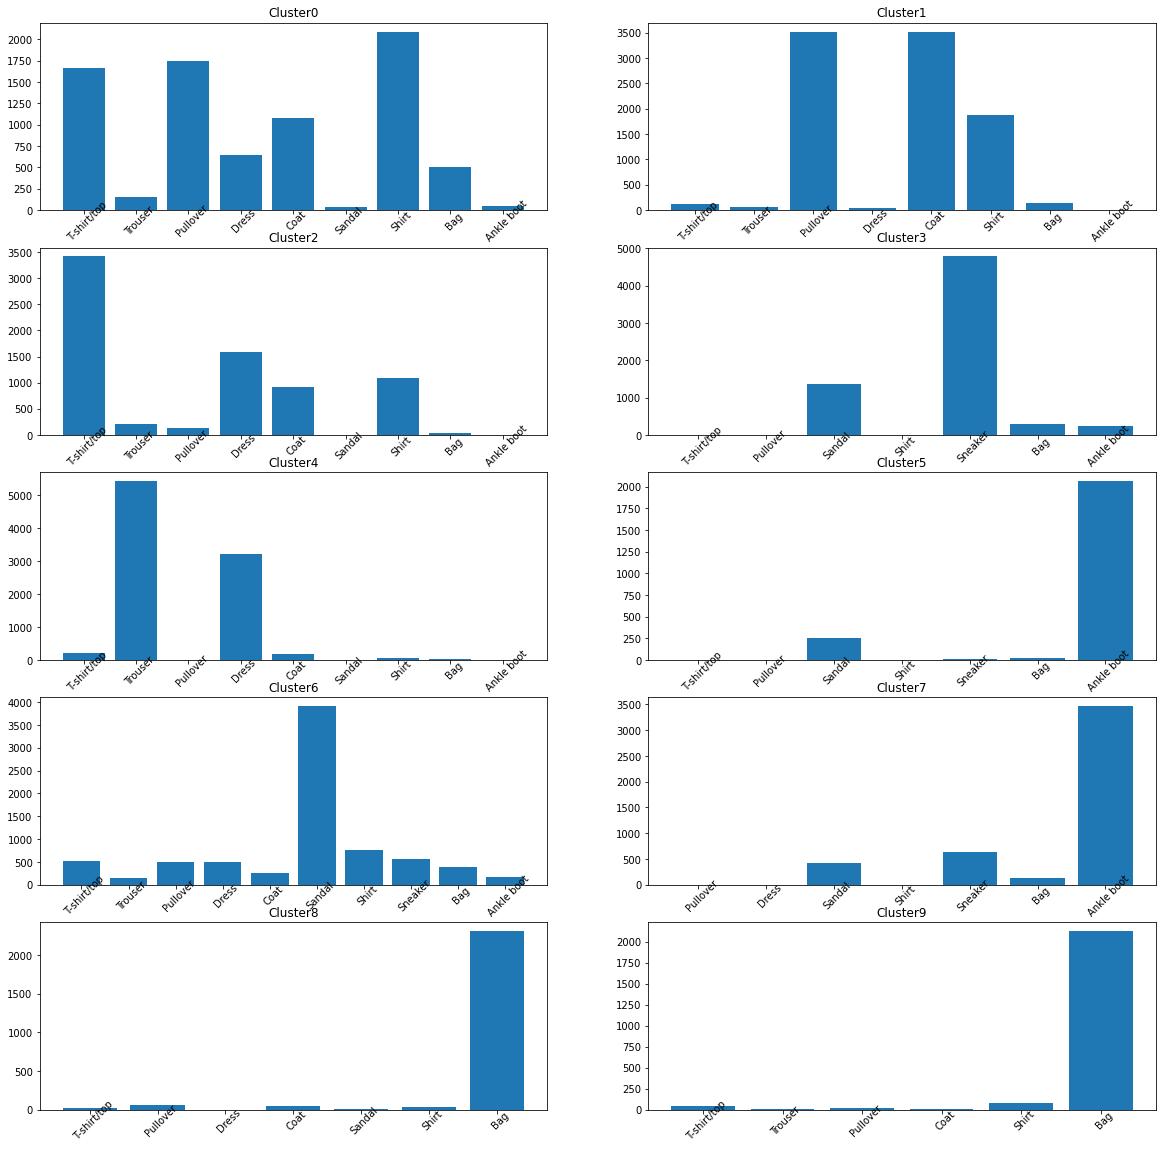

In [26]:
#Bar graph with the number of items of different categories clustered in it
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

In [27]:
k_means_cluster_centers = k_means.cluster_centers_ #numpy array of cluster centers
k_means_cluster_centers.shape #comes from 10 clusters and 420 features 

(10, 420)

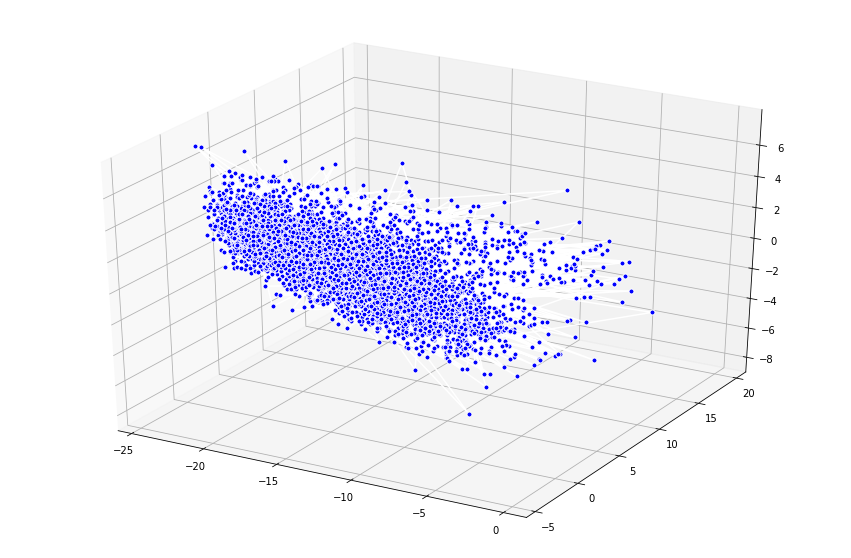

In [28]:
#cluster visualisation
my_members = (k_means_labels == 3) #Enter different Cluster number to view its 3D plot
my_members.shape
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1,projection='3d')
#Clus_dataSet.shape
#Clus_dataSet[my_members,300].shape
ax.plot(Clus_dataSet[my_members, 0], Clus_dataSet[my_members,1],Clus_dataSet[my_members,2], 'w', markerfacecolor="blue", marker='.',markersize=10)

In [29]:
#install these if you haven't
#!pip install chart_studio 
#!pip install plotly

In [30]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [31]:
#3D Plotly Visualisation of Clusters using go

layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)

colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(11)]
for i in range(0,10):
    my_members = (k_means_labels == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=Clus_dataSet[my_members, 0],
            y=Clus_dataSet[my_members, 1],
            z=Clus_dataSet[my_members, 2],
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
   
            )

fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9]], layout=layout)
    
py.offline.iplot(fig)


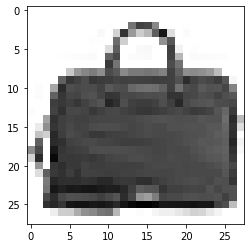

In [32]:
#If you hover over the points in the above plots you get an index value
n = 56180 #Use that value here to visualise the selected data
plt.imshow(X[n].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
